In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
from glob import glob

import matplotlib as mpl
import matplotlib.pyplot as plt
from fastcore.xtras import load_pickle

mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use(["science", "nature"])

import matplotx
import numpy as np
import pandas as pd

%matplotlib inline

In [12]:
all_res = glob("out/**/*.pkl")

In [13]:
compiled_res = []
compiled_gpr = []

for res in all_res:
    loaded = load_pickle(res)
    repre = loaded["representation"]
    num_points = loaded["num_train_points"]

    metrics = {
        "representation": loaded["representation"],
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["mean_absolute_error"],
        "max_error": loaded["max_error"],
        "mse": loaded["mean_squared_error"],
    }

    compiled_res.append(metrics)

    gpr_metrics = {
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["gpr_baseline"]["mean_absolute_error"],
        "max_error": loaded["gpr_baseline"]["max_error"],
        "mse": loaded["gpr_baseline"]["mean_squared_error"],
    }

    compiled_gpr.append(gpr_metrics)

In [14]:
compiled_res = pd.DataFrame(compiled_res)
compiled_gpr = pd.DataFrame(compiled_gpr)

In [15]:
compiled_grouped_res = compiled_res.groupby(["representation", "num_train_points"]).agg(
    ["mean", "std", "count"]
)

In [16]:
compiled_gpr_grouped = compiled_gpr.groupby(["num_train_points"]).agg(["mean", "std"])

In [17]:
compiled_grouped_res

mae                  max_error  \
                                     mean       std count       mean   
representation num_train_points                                        
InChI          10                0.676240       NaN     1   3.520000   
SELFIES        10                0.824770  0.209767     4   3.185000   
               20                0.768267  0.079081     3   3.320000   
               50                0.686653  0.040485     3   3.100000   
               100               0.650640  0.033231     3   3.636667   
               200               0.629980  0.008061     2   3.900000   
               1000              0.501720  0.043049     2   1.900000   
               5000              0.377120       NaN     1   1.380000   
SMILES         10                0.821360  0.111958     5   3.538000   
               20                0.752096  0.060821     5   3.430000   
               50                0.679377  0.054183     7   3.151429   
               100               0.646864  0.015779     5   3.234000   
               200               0.593500  0.006511     4   2.645000   
               1000              0.472880  0.042233     4   2.332500   
               5000              0.460650  0.197381     4  26.215000   

                                                        mse                   
                                       std count       mean        std count  
representation num_train_points                                               
InChI          10                      NaN     1   0.736266        NaN     1  
SELFIES        10                 0.310000     4   1.078488   0.499402     4  
               20                 0.744782     3   0.918837   0.138539     3  
               50                 0.659621     3   0.778944   0.107259     3  
               100                0.500833     3   0.716050   0.090726     3  
               200                0.947523     2   0.673287   0.031602     2  
               1000               0.254558     2   0.394306   0.071273     2  
               5000                    NaN     1   0.239338        NaN     1  
SMILES         10                 0.363689     5   1.112929   0.257570     5  
               20                 0.550681     5   0.946053   0.151064     5  
               50                 0.829306     7   0.764131   0.110091     7  
               100                0.203544     5   0.688629   0.039471     5  
               200                0.487340     4   0.560064   0.028697     4  
               1000               0.609446     4   0.383231   0.083849     4  
               5000              49.397411     4  10.278554  20.121321     4

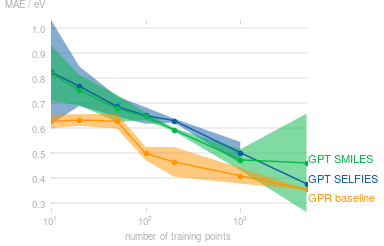

In [18]:
with plt.style.context(matplotx.styles.dufte):
    fig, ax = plt.subplots(1, 1)
    ax.plot(
        compiled_grouped_res.loc["SELFIES", :].index,
        compiled_grouped_res.loc["SELFIES", :]["mae"]["mean"],
        label="GPT SELFIES",
        marker="o",
    )

    ax.fill_between(
        compiled_grouped_res.loc["SELFIES", :].index,
        compiled_grouped_res.loc["SELFIES", :]["mae"]["mean"]
        - compiled_grouped_res.loc["SELFIES", :]["mae"]["std"],
        compiled_grouped_res.loc["SELFIES", :]["mae"]["mean"]
        + compiled_grouped_res.loc["SELFIES", :]["mae"]["std"],
        alpha=0.5,
    )

    ax.plot(
        compiled_grouped_res.loc["SMILES", :].index,
        compiled_grouped_res.loc["SMILES", :]["mae"]["mean"],
        label="GPT SMILES",
        marker="o",
    )

    ax.fill_between(
        compiled_grouped_res.loc["SMILES", :].index,
        compiled_grouped_res.loc["SMILES", :]["mae"]["mean"]
        - compiled_grouped_res.loc["SMILES", :]["mae"]["std"],
        compiled_grouped_res.loc["SMILES", :]["mae"]["mean"]
        + compiled_grouped_res.loc["SMILES", :]["mae"]["std"],
        alpha=0.5,
    )

    ax.plot(
        compiled_gpr_grouped.loc[:].index,
        compiled_gpr_grouped["mae"]["mean"],
        label="GPR baseline",
        marker="o",
    )

    ax.fill_between(
        compiled_gpr_grouped.loc[:].index,
        compiled_gpr_grouped.loc[:]["mae"]["mean"] - compiled_gpr_grouped.loc[:]["mae"]["std"],
        compiled_gpr_grouped.loc[:]["mae"]["mean"] + compiled_gpr_grouped.loc[:]["mae"]["std"],
        alpha=0.5,
    )

    matplotx.line_labels(fontsize=8)

    ax.set_xlabel("number of training points", labelpad=4)
    matplotx.ylabel_top("MAE / eV")
    ax.set_xscale("log")

fig.savefig("bandgap_regression_res.pdf", bbox_inches="tight")